In [2]:
import numpy as np
import pandas as pd
import csv
import os, re
from pandas import read_csv

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML



import sklearn
from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler


%matplotlib inline

## PCA on the iris dataset

In [14]:
iris = datasets.load_iris()
X = iris.data
variables_names = iris.feature_names
X[:3,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2]])

In [21]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

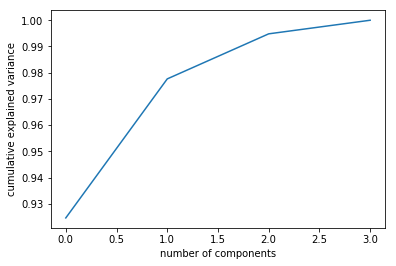

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
iris_pca[:3,]


array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561]])

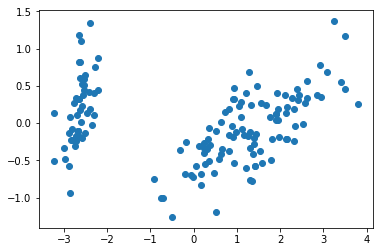

In [17]:

y = iris_pca[:,1]
x = iris_pca[:,0]
plt.scatter(x, y)
plt.show()

/home/seggs/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/seggs/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


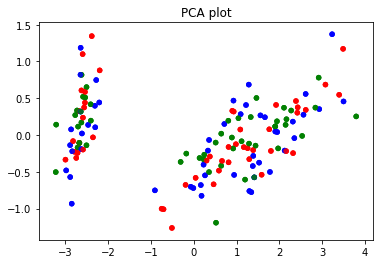

In [47]:

colors = ("red", "green", "blue")
target = ("setosa", "versicolor", "virginica") 
 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for target, color in zip(target, colors):
    ax.scatter(x, y, alpha=0.8, c=colors, edgecolors='none', s=30)
plt.title('PCA plot')
plt.legend()
plt.show()

In [11]:
pca.explained_variance_ratio_.sum()

1.0

In [20]:
comps = pd.DataFrame(pca.components_,columns=variables_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


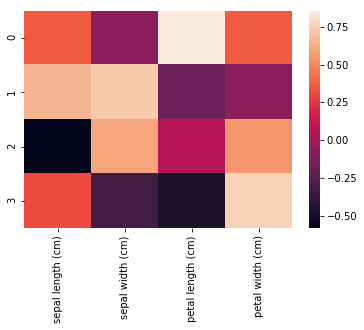

In [14]:
sns.heatmap(comps)

PCA from data import

In [3]:
'Read the iris dataset'
df = pd.read_csv('iris.csv',names=['sepal length','sepal width','petal length','petal width','target'])


In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values



In [5]:

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [7]:

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


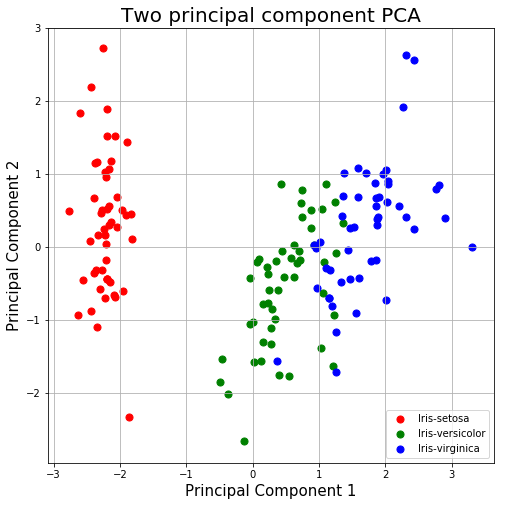

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two principal component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()